In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


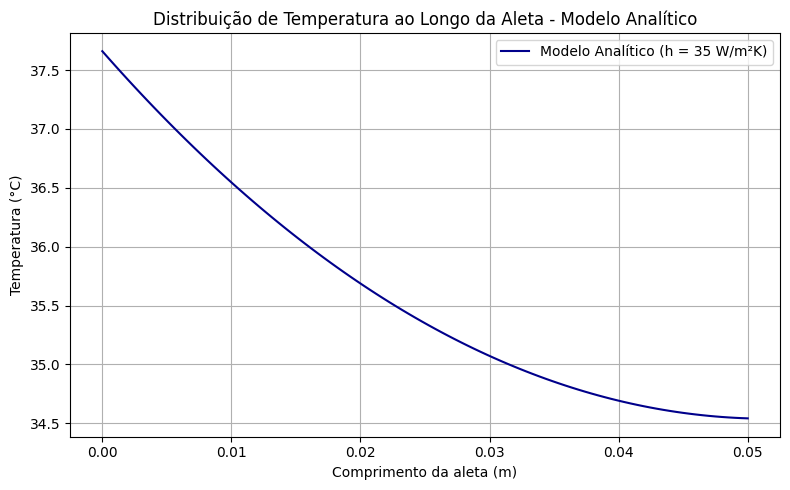

: 

In [ ]:

# --- PARÂMETROS CONHECIDOS E ESTIMADOS ---

# defina df

df = pd.read_excel("sistema1.xlsx")

# Temperatura ambiente média (canal 101, 115 e 116) - média das últimas 10 linhas
T_amb = 18.0229

# Temperatura na base da aleta (canal 102) - média das últimas 10 linhas
T_base = 37.66029778

# Temperatura média na aleta (canais 103 a 113) - para cálculo da condutividade na temperatura de filme
T_media_aleta = 37.95871721


# Temperatura de filme
T_film = (T_media_aleta + T_amb) / 2

# Condutividade térmica (k) do Alumínio 2014: estimada da curva no gráfico PDF (valor médio na faixa)
k = 160  # W/m.K (valor estimado visualmente no gráfico do projeto)

# Dimensões da aleta (assumidas do PDF e comuns para aletas tipo pino)
L = 0.05  # m (5 cm de comprimento)
D = 0.00635  # m (1/4 de polegada ≈ 6.35 mm)
Ac = np.pi * (D / 2) ** 2  # Área da seção transversal
P = np.pi * D              # Perímetro

# Estimativa para coeficiente de convecção h
h = 35 

# Cálculo do parâmetro m
m = np.sqrt(h * P / (k * Ac))

# --- CÁLCULO DA TEMPERATURA ANALÍTICA AO LONGO DA ALETA ---
x = np.linspace(0, L, 100)  # posições ao longo da aleta
numerador = np.cosh(m * (L - x)) + (h / (m * k)) * np.sinh(m * (L - x))
denominador = np.cosh(m * L) + (h / (m * k)) * np.sinh(m * L)
theta = numerador / denominador
T_analitico = T_amb + (T_base - T_amb) * theta

# --- GRÁFICO ---
plt.figure(figsize=(8, 5))
plt.plot(x, T_analitico, label=f"Modelo Analítico (h = {h} W/m²K)", color="darkblue")
plt.xlabel("Comprimento da aleta (m)")
plt.ylabel("Temperatura (°C)")
plt.title("Distribuição de Temperatura ao Longo da Aleta - Modelo Analítico")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
